<a href="https://colab.research.google.com/github/vasiliyeskin/MachineLearningExperiences/blob/master/text%20analysis/dl_nlp_imdb_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Плотное векторное представление слов для определения тональности текста отзывов на фильмы из IMDb (Internet Movie Database) 

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

## Набор данных IMDb movie review

[Набор данных IMDb movie review](https://ai.stanford.edu/~amaas/data/sentiment/) создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта [IMDb](https://www.imdb.com). Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс. отзывов:
- Набор данных для обучения - 25 тыс. отзывов
- Набор данных для тестирования - 25 тыс. отзывов

Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:
- 0 - отзыв отрицательный
- 1 - отзыв положительный

С точки зрения машинного обучения это задача бинарной классификации.

Набор данных описан в статье: [Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)](https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf).

<img src="https://www.dropbox.com/s/grd17bkapocb92o/imdb_movie_reviews.png?dl=1" width="600">


In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

## Загружаем данные

In [2]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 0s 0us/step


## Просмотр данных

Рецензия

In [4]:
x_train[3]

[1,
 4,
 2,
 2,
 33,
 2804,
 4,
 2040,
 432,
 111,
 153,
 103,
 4,
 1494,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 3715,
 761,
 61,
 5766,
 452,
 9214,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 1239,
 41,
 1797,
 9,
 15,
 7,
 35,
 744,
 2413,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 7339,
 6,
 3693,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 1447,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 6004,
 4,
 1615,
 5,
 2,
 7,
 5168,
 17,
 13,
 7064,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 3772,
 3501,
 8,
 2722,
 58,
 10,
 10,
 537,
 2116,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2504,
 182,
 5,
 17,
 75,
 2306,
 922,
 36,
 279,
 131,
 2895,
 17,
 2867,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 1219,
 3890,
 19,
 2,
 217,
 4122,
 1710,
 537,
 2,
 1236,
 5,
 736,
 10,
 10,


Правильный ответ

In [5]:
y_train[3]

1

## Подготовка данных для обучения

In [6]:
maxlen = 200

In [7]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [8]:
x_train[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

In [9]:
y_train[3]

1

## Создание нейронной сети

In [10]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [12]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 1s 5ms/step - loss: 0.6890 - accuracy: 0.5466 - val_loss: 0.6727 - val_accuracy: 0.6620
Epoch 2/15
176/176 [==============================] - 1s 4ms/step - loss: 0.5973 - accuracy: 0.7421 - val_loss: 0.5088 - val_accuracy: 0.8032
Epoch 3/15
176/176 [==============================] - 1s 4ms/step - loss: 0.4314 - accuracy: 0.8338 - val_loss: 0.3927 - val_accuracy: 0.8484
Epoch 4/15
176/176 [==============================] - 1s 4ms/step - loss: 0.3403 - accuracy: 0.8727 - val_loss: 0.3446 - val_accuracy: 0.8596
Epoch 5/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2938 - accuracy: 0.8886 - val_loss: 0.3199 - val_accuracy: 0.8728
Epoch 6/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2628 - accuracy: 0.9007 - val_loss: 0.3061 - val_accuracy: 0.8800
Epoch 7/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2416 - accuracy: 0.9104 - val_loss: 0.2973 - val_accuracy: 0.8820
Epoch 

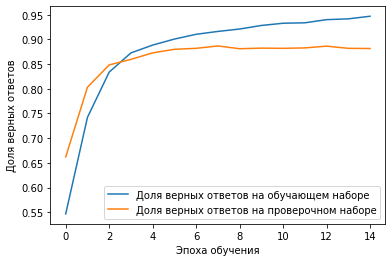

In [13]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [14]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 1s 2ms/step - loss: 0.3035 - accuracy: 0.8719


## Исследуем обученное плотное векторное представление слов

**Получаем матрицу плотных векторных представлений слов**

In [15]:
embedding_matrix = model.layers[0].get_weights()[0]

In [16]:
embedding_matrix[:5]

array([[ 0.01775278, -0.01071973],
       [-0.08913716, -0.1398809 ],
       [-0.01496352, -0.038607  ],
       [ 0.04233198, -0.01149832],
       [ 0.02856749,  0.01947595]], dtype=float32)

**Загружаем словарь с номерами слов**

In [17]:
word_index_org = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


Дополняем словарь служебными символами

In [18]:
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2  
word_index["<Не используется>"] = 3

**Ищем векторы для слов**

In [19]:
word = 'good'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 52
Вектор для слова [0.13116442 0.19546132]


## Сохраняем обученные плотные векторные представления в файл

**Составляем реверсивный словарь токенов (слов)**

In [20]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

**Записываем плотные векторные представления в файл**

In [21]:
filename = 'imdb_embeddings.csv'

In [22]:
with open(filename, 'w') as f:
    for word_num in range(max_words):
      word = reverse_word_index[word_num]
      vec = embedding_matrix[word_num]
      f.write(word + ",")
      f.write(','.join([str(x) for x in vec]) + "\n")

In [23]:
!head -n 20 $filename

<Заполнитель>,0.017752778,-0.010719729
<Начало последовательности>,-0.08913716,-0.1398809
<Неизвестное слово>,-0.014963522,-0.038606998
<Не используется>,0.042331982,-0.011498321
the,0.02856749,0.019475954
and,0.058479123,0.06064102
a,-0.008638257,0.01331944
of,-0.017723743,-0.013953795
to,0.04270513,-0.0253701
is,0.045620985,0.058833215
br,-0.033056214,-0.003944086
in,-0.03195438,0.048740406
it,0.03730634,0.08372279
i,3.2071148e-05,0.040812496
this,0.023553964,-0.04373561
that,0.035391673,-0.032240175
was,-0.04302964,-0.037608843
as,0.0057052705,0.04240032
for,-0.0038509467,-0.027508682
with,-0.013370746,0.025065897


**Сохраняем файл на локальный компьютер**

In [ ]:
files.download('imdb_embeddings.csv')

## Визуализация плотных векторных представлений слов

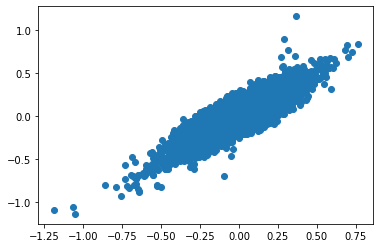

In [24]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

Выбираем коды слов, по которым можно определить тональность отзыва

In [25]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

Получаем векторное представление интересующих нас слов

In [26]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[ 0.28043115,  0.5785911 ],
       [ 0.57034874,  0.5601594 ],
       [ 0.5643613 ,  0.58090097],
       [ 0.13116442,  0.19546132],
       [-0.41107452, -0.49755245],
       [-1.0682771 , -1.0588523 ],
       [-0.5276119 , -0.5401538 ],
       [-0.6769368 , -0.7072396 ],
       [-0.11419214, -0.3521741 ]], dtype=float32)

Визуализация обученного плотного векторного представления слов, по которым можно определить эмоциональную окраску текста

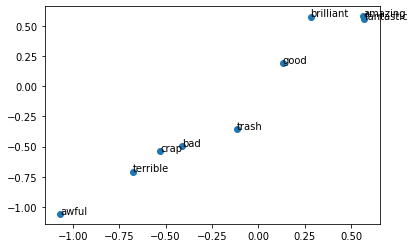

In [27]:
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))